<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_p290~319(303~310_%EC%A0%9C%EC%99%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**5.회귀**
###**1.회귀소개**
* 데이터값은 평균과같은 일정한 값으로 돌아가려는 경향을 이용한 기법
* 독립변수: 피처
* 종속변수: 결정값
> 피처값과 결정값 데이터 기반에서 학습을 통한 **최적의 회귀계수** 찾기
* 지도학습의 일부, 분류는 예측값이 이산형/ 회귀는 연속형 숫자값
* 규제( 일반적 선형회귀 과적합문제 해결을 위해 회귀계수에 페널티값적용) 에 따른 유형존재

> * 일반선형회귀: 예측과 실제값의 RSS최소화하는 회귀계수를 최적화하고 규제를 적용하지 않음
> - 릿지: 선형회귀에 L2규제 추가-큰회귀계수의 예측 영향도를 감소하기위한 규제
> - 라쏘: 선형회귀에 L1규제를 적용한방식-예측 영향력이 적은 피처의 회귀계수를 0으로 만듬
>- 엘라스틱넷: L1,L2규제를 함께 결합한 모델- 피처가 많은 데이터세트에 적용
>- 로지스틱회귀: 강력한 분류알고리즘
###**2. 단순 선형 회귀를 이용한 회귀이해**
* 오류합 계산은 절댓값을 취해 더하거나 오류의 제곱을 더해서 구하는 방식(error^2=RSS)
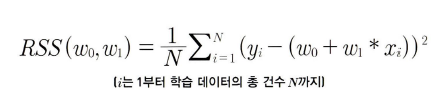

RSS는 비용이며 w변수로 구성되는 RSS를 비용함수라고 한다. (=손실함수)
###**3. 비용최소화하기-경사하강법**
* 경사하강법: 고차원 방정식에 대한 문제를 해결하면서 RSS를 최소화하는 방법을 제공
* 위의 RSS식을 R(w)로 지정
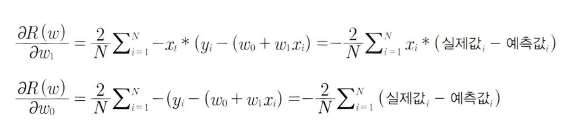


* R(w) 최소화하는 w0와 w0을 편미분한 값을 반복적으로 보정하면서 최소화한다. 
* 편미분값이 클 수 있으므로 보정계수 eta를 곱하는데 이를 학습률이라고 한다.
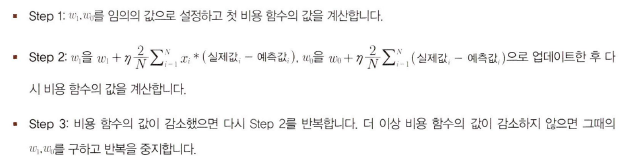



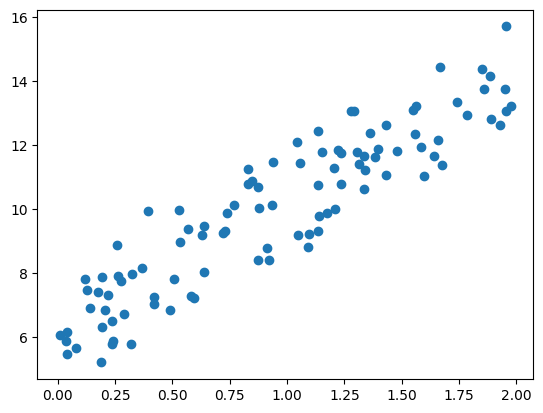

In [1]:
# y=4X+6을 근사하기 위한 100개 데이터세트만들고 경사하강법으로 회귀계수 도출
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
# 비용함수 get_cost()는 실제 y값과 예측된 y를 인자로받아 계산후 반환

def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N 
  return cost

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [5]:
#gradient_decent_steps()를 호출해 w1,w0구하고 RSS차이 계산하는 get_cost()함수 생성후 경사하강법의 예측오류 계산

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


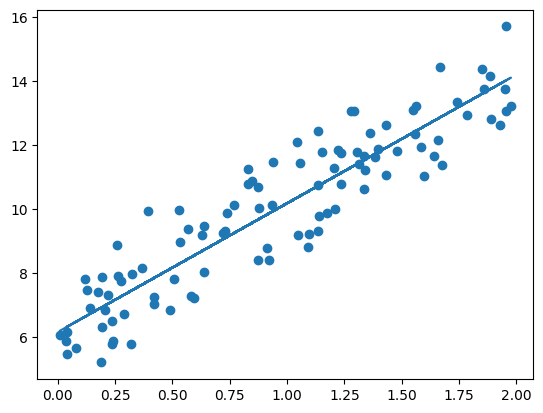

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

* 경사하강법은 학습데이터에 대해 반복적으로 비용함수 최소화를위한 값을 업데이트하여 시간이 오래걸린다
* -> 확률적 경사하강법 이용
> 일부데이터만 이용해 w가 업데이트되는 값을 계산하여 빠른 속도 보장

In [9]:
# stochastic_gradient_descent_steps()함수 사용- X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update 계산부분만 차이있음

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 차이점: 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [10]:
# stochastic_gradient_descent_steps()를 이용해 w1,w0 및 예측 오류 비용을 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


w0,w1에 큰차이가 없으며 예측성능상 큰 차이가 없다.
###**05. 다항회귀와 과적합/과소적합 이해**
### 다항회귀 이해
* 다항식으로 표현되는 회귀를 다항회귀라고 한다
* 비선형함수를 선형모델에 적용시켜 사이킷런에서 구현



In [11]:
#PolynomialFeatures를 이용해 단항값을 다항값으로 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [12]:
#3차다항회귀식을 이용해 회귀계수를 예측
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [13]:
# 3차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


* 피처가 2개에서 10개로 늘어남
* LinearRegression을 통해 3차 다항회귀형태의 다항회귀를 적용하면 회귀계수가 10개로 늘어난다.
* PolynomialFeatures로 피처를 변환시킨후 LinearRegression클래스로 다항회귀 구현

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항회귀를 이용한 과소적합 및 과적합이해
* 차수가 높아질수록 과적합의 문제발생
> 다음예제
> * 원래 데이터세트는 피처X와 target y가 잡음이 포함된 다항힉의 코사인 그래프 관계를 가지도록 만들어준다. 
> * 이에 기반해 회귀의 차수를 변화시키면서 이에 따른 회귀예측곡선과 예측 정확도를 비교하는 예제

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


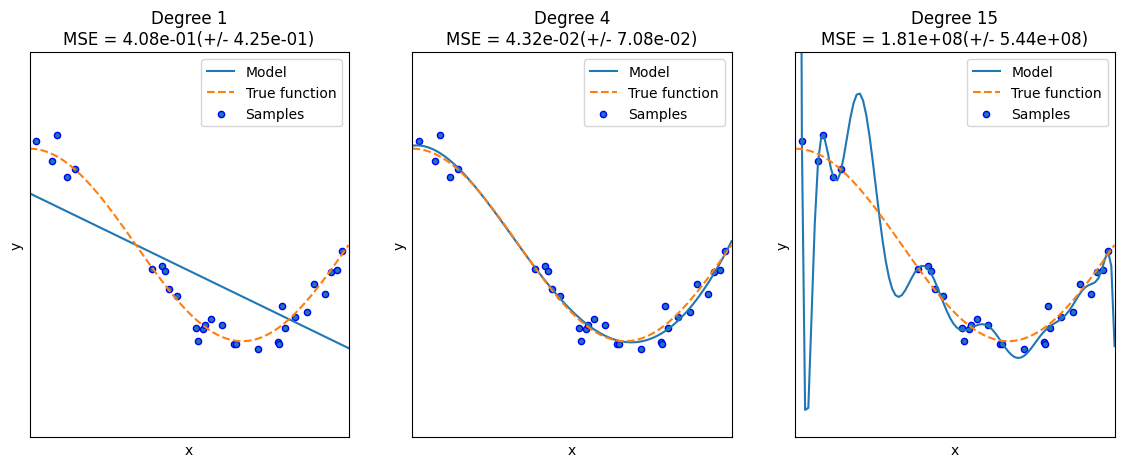

In [16]:
# 비교할 다항식차수를 변경하면서 예측결과 비교
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

* 실선으로 표현된 곡선은 다항 회귀 예측곡선
* 전선으로 표현된 곡선은 실제 데이터세트의 코사인 곡선
> * Degree1: 과소적합모델, 한방향으로 치우침
>* Degree4: 데이터를 잘 예측한 곡선
>- Degree15: 변동잡음값까지 지나치게 반영한결과, 높은수준의 MSE값

#### 편향-분산 트레이드오프
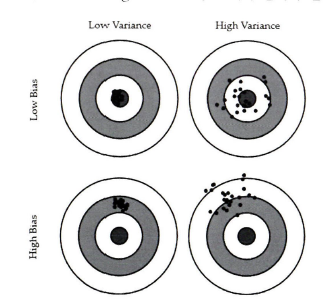

* 상단왼쪽: 저편향/저분산- 실제결과에 근접하면서 예측변동이 크지않고 특정부분에 집중되어있는 성능
* 상단오른쪽: 저편향/고분산: 예측결과가 실제결과를 중심으로 넓게분포
* 하단왼쪽: 고편향/저분산: 예측이 특정부분에 집중
* 하단오른쪽: 고편향/고분산: 정확한 예측을 벗어나면서 고르게분포
> 편향이 높으면 분산이낮아지고(과소적합) 분산이높으면 편향이 낮아진다(과적합)